In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pylab as matlib
from pdastro import pdastrostatsclass, AandB, AnotB, AorB, not_AandB

import warnings
warnings.simplefilter('error', RuntimeWarning)
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times'

#https://towardsdatascience.com/5-powerful-tricks-to-visualize-your-data-with-matplotlib-16bc33747e05

def dataPlot(x, y, dx=None, dy=None, sp=None, label=None, fmt='bo', ecolor='k', elinewidth=None, barsabove = False, capsize=1, logx=False, logy=False):
    if sp == None:
        sp = matlib.subplot(111)
    if dx is None and dy is None:
        if logy:
            if logx:
                plot, = sp.loglog(x, y, fmt)
            else:
                plot, = sp.semilogy(x, y, fmt)
        elif logx:
            plot, = sp.semilogx(x, y, fmt)
        else:
            if barsabove:
                plot, dplot,dummy = sp.errorbar(x, y, label=label, fmt=fmt, capsize=capsize, barsabove=barsabove)
            else:
                plot, = sp.plot(x, y, fmt)
        return sp, plot, None
    else:
        if logy:
            sp.set_yscale("log", nonposx='clip')
        if logx:
            sp.set_xscale("log", nonposx='clip')
        plot, dplot, dummy = sp.errorbar(x, y, xerr=dx, yerr=dy, label=label, fmt=fmt, ecolor=ecolor, elinewidth=elinewidth, capsize=capsize, barsabove=barsabove)
        return sp, plot, dplot

Information about template changes at MJDs 58417 and 58882: https://fallingstar-data.com/forcedphot/faq/

<strong>Procedure</strong>

Step A: Does a correlation exist between the "good"/"bad" classification of a SN and the PSF chi square distribution of its bad measurements?
1. Obtain SNe with a high uJy/duJy, of which half are "good" and half are "bad."
    - Estimate rough brightness of each SN by getting 90th percentile flux and determine if SN is a good candidate.
    - To confirm their classifications, take the baseline uJy/duJy and apply a 3-sigma cut. "Bad" SNe will have: sigma > 1.5, % data cut > 5%. 
2. For each SN, take the measurements for which abs(uJy/duJy)>3. Then plot a histogram of only those measurements' PSF chi squares on a logarithmic scale. Do the same for abs(uJy/duJy)<=3, and compare to the ones with abs(uJy/duJy)>3.
3. Combine the histograms of each SN and colorcode them. 
4. See if each SN's classification is predicted by its chi square distribution on the histogram. 

Step B: Does a correlation exist between the "good"/"bad" classification of a SN and its x2PSF vs. S/N plot?
1. For both samples of "good" and "bad" SNe, plot their PSF chi squares vs. uJy/duJy. 
2. See if each SN's classification is predicted by the shape of its graph ("shallow" or "hockey stick").

Loading SN 2020lse at /Users/sofiarest/OneDrive - Johns Hopkins/Freshman Year/researchpaper/atlaslc_chisquare/brightsne/2020lse/2020lse_i000.o.lc.txt...
Loading SN 2020jfo at /Users/sofiarest/OneDrive - Johns Hopkins/Freshman Year/researchpaper/atlaslc_chisquare/brightsne/2020jfo/2020jfo_i000.o.lc.txt...
Loading SN 2019vxm at /Users/sofiarest/OneDrive - Johns Hopkins/Freshman Year/researchpaper/atlaslc_chisquare/brightsne/2019vxm/2019vxm_i000.o.lc.txt...
Loading SN 2017gjn at /Users/sofiarest/OneDrive - Johns Hopkins/Freshman Year/researchpaper/atlaslc_chisquare/brightsne/2017gjn/2017gjn_i000.o.lc.txt...
Loading SN 2017glq at /Users/sofiarest/OneDrive - Johns Hopkins/Freshman Year/researchpaper/atlaslc_chisquare/brightsne/2017glq/2017glq_i000.o.lc.txt...
Loading SN 2017gup at /Users/sofiarest/OneDrive - Johns Hopkins/Freshman Year/researchpaper/atlaslc_chisquare/brightsne/2017gup/2017gup_i000.o.lc.txt...
Loading SN 2017guu at /Users/sofiarest/OneDrive - Johns Hopkins/Freshman Year/rese

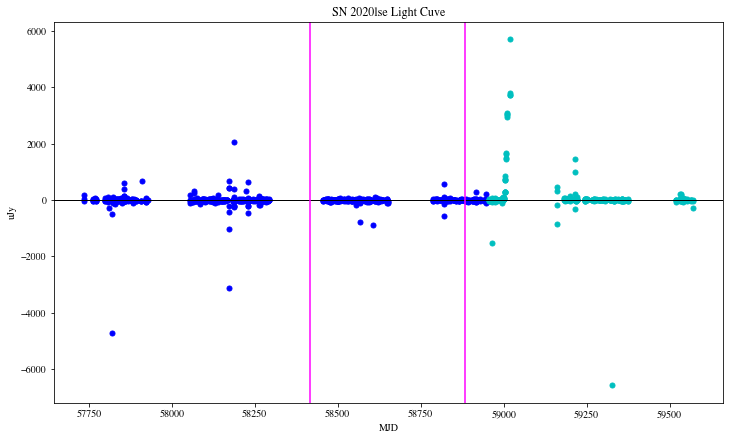

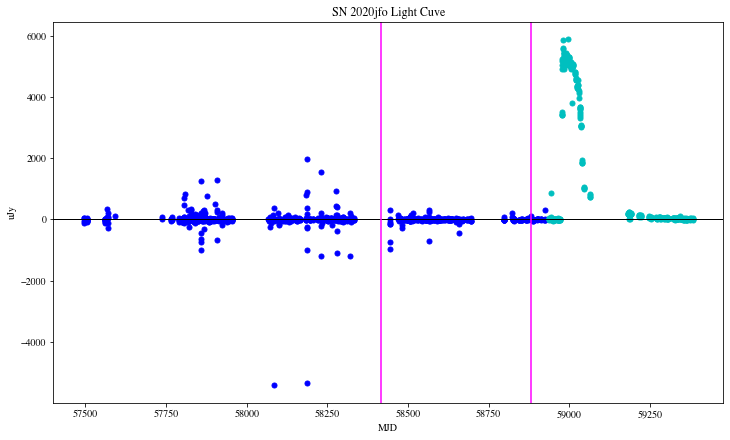

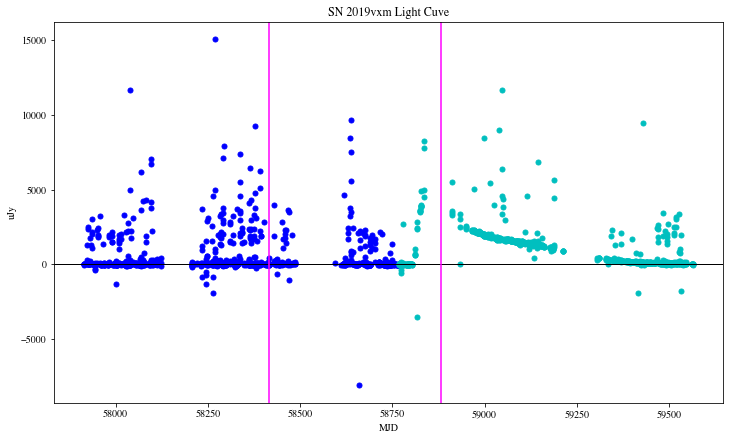

In [2]:
# Obtain 2 or 4 preliminary SNe with a high uJy/duJy, of which half are "good" and half are "bad."

good_lc = {}
bad_lc = {}
unknown_lc = {}

lc_info = pdastrostatsclass()
lc_info.t['tnsname'] = ['2020lse','2019vxm','2020jfo','2017gjn','2017glq','2017gup','2017guu','2017guv','2017haf','2017gqr','2017guh','2017gvp','2017ghu','2017hgz','2017hjw','2017hjy','2017hoq','2017hpa','2017hou','2017igf','2017isq','2017gxq','2017isj','2017iyb','2017iji','2017jav','2017iyw','2017jyl','2018cqw','2020ejm','2017izu','2019syd','2017gjd','2018jaj','2018jov','2018jaz','2018jaz','2018imd','2018kfv','2017jd','2018pc','2020fcw','2018hkq','2019wdx','2018lqy','2018gfi','2018K','2020dkm','2018yh','2020afp','2019wrz','2018gv','2018iq','2018gl','2018kp','2018oh','2018pv','2018xx','2018yu','2018aaz','2018zz','2018ajp','2018aqh','2018aoz','2018aqi','2018azu','2018aye','2018cnj','2018cqj','2018cuw','2018dda','2018dzy','2018ebk','2018ddi','2018enc','2018epx','2018etm','2018feb','2018fop','2018fli','2018fnq','2018fhx']
lc_info.t['mjdstart'] = [58955.26,58768.04,58925.20,57994.85992,57999.35754,58013.556,58009.58899,58011.305,58026.5,58005.1567,58014.31,58019.48,57991.4866,58036.02,58040.57399,58040.49699,58047.551,58051.34602,58050.37014,58075.59,58091.618,58013.453,58089.34568,58103.44699,58077.64,58106.24301,58105.3,58117.546,58287.2,58919.23791,58101.97699,58767.10699,57994.09,58447.48199,58460.583,58442.51023,58442.51023,58436.8626,58468.28699,57762.21399,58152.75,58936.437,58406.37,58824.38,58358.39,58373.4,58121.13589,58904.44051,58173.25,58866.66,58832.48,58133.68132,58137.49453,58131.56999,58142.36257,58153.49,58152.63133,58170.38199,58178.223,58183.56689,58180.92,58195.81,58213.44899,58210.30899,58214.07,58220.28699,58229.31,58266.61199,58282.268,58293.515,58303.96,58315.59399,58315.55199,58301.44,58332.32699,58335.605,58338.343,58346.16399,58351.56899,58343.15199,58361.08,58351.38]
lc_info.t['classification'] = ['good','bad','good',None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
lc_info.t['lc_dict key'] = [None] * len(lc_info.t)

lc_info_good = lc_info.t.loc[np.where(lc_info.t['classification']=='good')[0]]
lc_info_bad = lc_info.t.loc[np.where(lc_info.t['classification']=='bad')[0]]
lc_info_unknown = lc_info.t.loc[AnotB(lc_info.getindices(),AorB(np.where(lc_info.t['classification']=='good')[0],np.where(lc_info.t['classification']=='bad')[0]))]

def load_lc_dicts(lc_dict, lc_info):
    lc_info = lc_info.reset_index(drop=True)
    for index in range(0,len(lc_info)):
        lc_info.loc[index,'lc_dict key'] = index
        lc_dict[index] = pdastrostatsclass()
        dir = '/Users/sofiarest/OneDrive - Johns Hopkins/Freshman Year/researchpaper/atlaslc_chisquare/'
        filename = dir+'brightsne/'+lc_info.loc[index,'tnsname']+'/'+lc_info.loc[index,'tnsname']+'_i000.o.lc.txt'
        print('Loading SN '+lc_info.loc[index,'tnsname']+' at '+filename+'...')
        lc_dict[index].load_spacesep(filename,delim_whitespace=True)
        lc_dict[index].t['uJy/duJy'] = lc_dict[index].t['uJy']/lc_dict[index].t['duJy']
    return lc_dict, lc_info

def plot_lc(lc_dict, lc_info):
    lc_info = lc_info.reset_index(drop=True)
    for index in range(0,len(lc_info)):
        plt.figure()

        baseline = np.where(lc_dict[index].t['MJD'] < lc_info.loc[index,'mjdstart'])[0]
        aftersn = np.where(lc_dict[index].t['MJD'] > lc_info.loc[index,'mjdstart'])[0]

        sp, plot_baseline, dplot = dataPlot(lc_dict[index].t.loc[baseline,'MJD'],lc_dict[index].t.loc[baseline,'uJy'])
        matlib.setp(plot_baseline,ms=5,color='b',marker='o')
        sp, plot_aftersn, dplot = dataPlot(lc_dict[index].t.loc[aftersn,'MJD'],lc_dict[index].t.loc[aftersn,'uJy'])
        matlib.setp(plot_aftersn,ms=5,color='c',marker='o')

        plt.axhline(linewidth=1,color='k')
        plt.ylabel('uJy')
        plt.xlabel('MJD')
        plt.title('SN '+lc_info.loc[index,'tnsname']+' Light Cuve')

        plt.axvline(x=58882,color='magenta')
        plt.axvline(x=58417,color='magenta')

good_lc, lc_info_good = load_lc_dicts(good_lc, lc_info_good)
bad_lc, lc_info_bad = load_lc_dicts(bad_lc, lc_info_bad)
unknown_lc, lc_info_unknown = load_lc_dicts(unknown_lc, lc_info_unknown)
lc_info = pd.concat([lc_info_good,lc_info_bad,lc_info_unknown],ignore_index=True)
print(lc_info)

plot_lc(good_lc, lc_info_good)
plot_lc(bad_lc, lc_info_bad)
#plot_lc(unknown_lc, lc_info_unknown)

In [3]:
# Estimate rough brightness of each SN by getting 90th percentile flux from mjdstart to mjdstart+60 and determine if SN is a good candidate.

def get_90th_percentile_flux(lc, info):
    target = AandB(np.where(lc.t['MJD']>info['mjdstart'])[0], np.where(lc.t['MJD']<info['mjdstart']+60)[0])
    if len(target)==0: 
        return None
    else:
        return np.percentile(lc.t.loc[target, 'uJy'], 90)

def remove_SN(lc_info,index):
    print('Removing SN at index %d...' % index)
    lc_info = lc_info.drop([index])
    lc_info = lc_info.reset_index(drop=True)
    return lc_info

def get_90th_percentile_flux_loop(lc_dict, lc_info):
    lc_info = lc_info.reset_index(drop=True)
    index = 0
    while index < len(lc_info):
        flux = get_90th_percentile_flux(lc_dict[lc_info.loc[index,'lc_dict key']], lc_info.loc[index])
        if flux is None:
            print('WARNING: For %s, 90th percentile flux not found' % (lc_info.loc[index,'tnsname']))
            lc_info = remove_SN(lc_info,index)
        elif(flux > 1000):
            print('For %s, 90th percentile flux %0.2f is over 1000 ' % (lc_info.loc[index,'tnsname'], flux) + u'\u2713')
            index += 1
        else:
            print('WARNING: For %s, 90th percentile flux %0.2f is under 1000' % (lc_info.loc[index,'tnsname'], flux))
            lc_info = remove_SN(lc_info,index)
    
    lc_info = lc_info.reset_index(drop=True)
    return lc_dict, lc_info

good_lc, lc_info_good = get_90th_percentile_flux_loop(good_lc, lc_info_good)
bad_lc, lc_info_bad = get_90th_percentile_flux_loop(bad_lc, lc_info_bad)
unknown_lc, lc_info_unknown = get_90th_percentile_flux_loop(unknown_lc, lc_info_unknown)
lc_info = pd.concat([lc_info_good,lc_info_bad,lc_info_unknown],ignore_index=True)
print('\nRevised sample of bright SNe: \n',lc_info)

# To confirm their classifications, take the baseline uJy/duJy and apply a 3-sigma cut. "Bad" SNe will have: sigma > 1.5, % data cut > 5%. 

stdev_limit = 1.5
nclippercent_limit = 5.0
print('\nstdev limit: %0.1f, %% data clipped limit: %0.1f' % (stdev_limit, nclippercent_limit))

def sigmacut_lc_dicts(lc, info):
    baseline = np.where(lc.t['MJD'] < info['mjdstart'])[0]
    lc.calcaverage_sigmacutloop('uJy/duJy',noisecol=None,indices=baseline,verbose=1,Nsigma=3.0,median_firstiteration=True)
    print('stdev: ',lc.statparams['stdev'],', % data clipped: ',100*lc.statparams['Nclip']/len(lc.t))

    output = 'Classified as '
    if lc.statparams['stdev'] is None or lc.statparams['Nclip'] is None:
        classification = 'bad'
    elif(lc.statparams['stdev']<stdev_limit and (100*lc.statparams['Nclip']/len(lc.t))<nclippercent_limit):
        classification = 'good'
    else: 
        classification = 'bad'
    output += classification + ' SN; '
    if(info['classification']==classification):
        output += 'consistent with preliminary classification ' + u'\u2713'
    else:
        output += 'WARNING: not consistent with preliminary classification (\'%s\')\nReclassifying in table...' % info['classification']
        info['classification'] = classification
    print(output)

    return info

def sigmacut_lc_dicts_loop(lc_dict, lc_info):
    lc_info = lc_info.reset_index(drop=True)
    for index in range(0, len(lc_info)):
        print('\nSigmacutting %s...' % lc_info.loc[index,'tnsname'])
        lc_info.loc[index] = sigmacut_lc_dicts(lc_dict[lc_info.loc[index,'lc_dict key']], lc_info.loc[index])
    return lc_info

lc_info_good = sigmacut_lc_dicts_loop(good_lc, lc_info_good)
lc_info_bad = sigmacut_lc_dicts_loop(bad_lc, lc_info_bad)
lc_info_unknown = sigmacut_lc_dicts_loop(unknown_lc, lc_info_unknown)
lc_info = pd.concat([lc_info_good,lc_info_bad,lc_info_unknown],ignore_index=True)
print('\nRevised sample of bright SNe: \n',lc_info)

# Copy over unknown-classification light curves into good_lc and bad_lc



For 2020lse, 90th percentile flux 1098.20 is over 1000 ✓
For 2020jfo, 90th percentile flux 5365.40 is over 1000 ✓
For 2019vxm, 90th percentile flux 2395.10 is over 1000 ✓
For 2017gjn, 90th percentile flux 2429.40 is over 1000 ✓
For 2017glq, 90th percentile flux 4546.00 is over 1000 ✓
Removing SN at index 2...
Removing SN at index 2...
Removing SN at index 2...
For 2017haf, 90th percentile flux 1625.60 is over 1000 ✓
Removing SN at index 3...
For 2017guh, 90th percentile flux 1806.00 is over 1000 ✓
For 2017gvp, 90th percentile flux 1064.40 is over 1000 ✓
Removing SN at index 5...
For 2017hgz, 90th percentile flux 2453.40 is over 1000 ✓
For 2017hjw, 90th percentile flux 1276.00 is over 1000 ✓
For 2017hjy, 90th percentile flux 1821.00 is over 1000 ✓
Removing SN at index 8...
For 2017hpa, 90th percentile flux 1957.10 is over 1000 ✓
Removing SN at index 9...
For 2017igf, 90th percentile flux 3890.60 is over 1000 ✓
For 2017isq, 90th percentile flux 1963.80 is over 1000 ✓
Removing SN at index

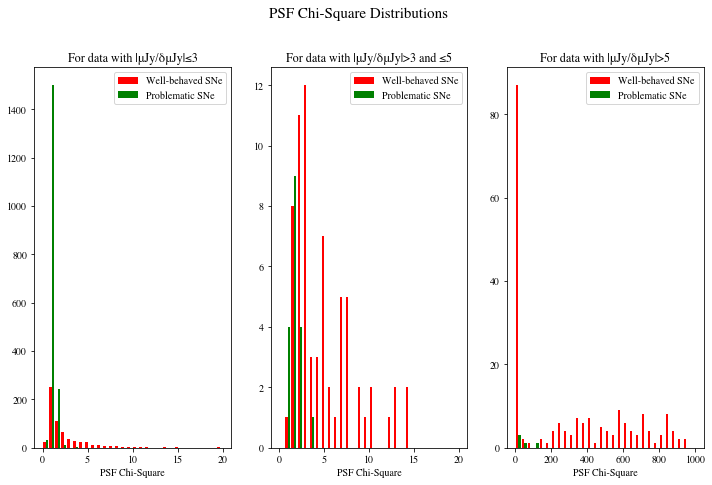

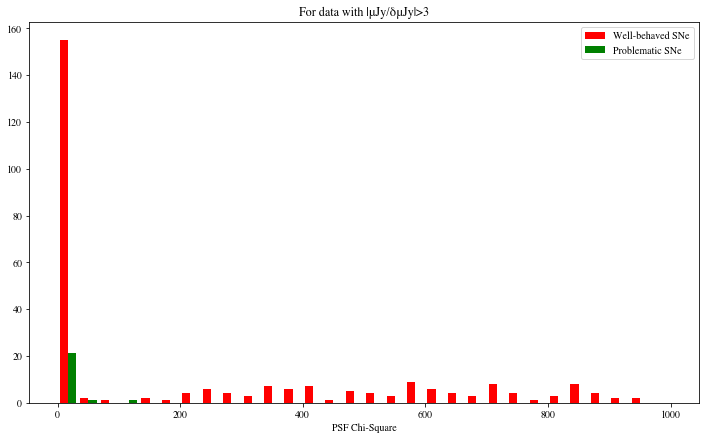

In [4]:
# For each SN, take the measurements for which abs(uJy/duJy)>3 and for which abs(uJy/duJy)<=3.
# Then plot two histograms of those measurements' PSF chi squares on a logarithmic scale. 
# Combine the histograms of each SN and colorcode them. 
# See if each SN's classification is predicted by its chi square distribution on the histograms. 

def get_data(lc_dict,lc_info):
    lc_info = lc_info.reset_index(drop=True)

    # 3 dfs to store all chi squares corresponding to their uJy/duJy ranges
    leq3_df = pd.Series()
    gr3l5_df = pd.Series()
    gr5_df = pd.Series()

    # for each SN
    for index in range(0,len(lc_info)):
        baseline = np.where(lc_dict[lc_info.loc[index,'lc_dict key']].t['MJD'] < lc_info.loc[index,'mjdstart'])[0]

        leq3 = np.where(abs(lc_dict[lc_info.loc[index,'lc_dict key']].t['uJy/duJy']) <= 3)[0]
        gr3l5 = AandB(np.where(abs(lc_dict[lc_info.loc[index,'lc_dict key']].t['uJy/duJy']) > 3)[0], np.where(abs(lc_dict[lc_info.loc[index,'lc_dict key']].t['uJy/duJy']) <= 5)[0])
        gr5 = np.where(abs(lc_dict[lc_info.loc[index,'lc_dict key']].t['uJy/duJy']) > 5)[0]

        # add chi squares to their corresponding dfs
        leq3_df = pd.concat([leq3_df, lc_dict[lc_info.loc[index,'lc_dict key']].t.loc[AandB(leq3,baseline),'chi/N']], ignore_index=True)
        gr3l5_df = pd.concat([gr3l5_df, lc_dict[lc_info.loc[index,'lc_dict key']].t.loc[AandB(gr3l5,baseline),'chi/N']], ignore_index=True)
        gr5_df = pd.concat([gr5_df, lc_dict[lc_info.loc[index,'lc_dict key']].t.loc[AandB(gr5,baseline),'chi/N']], ignore_index=True)
    
    return leq3_df, gr3l5_df, gr5_df

fig, axes = plt.subplots(nrows=1, ncols=3)
plt.suptitle('PSF Chi-Square Distributions',fontsize=15, y=1)
leq3_hist, gr3l5_hist, gr5_hist = axes.flatten()

g_leq3_df, g_gr3l5_df, g_gr5_df = get_data(good_lc,lc_info_good)
b_leq3_df, b_gr3l5_df, b_gr5_df = get_data(bad_lc,lc_info_bad)

leq3_hist.hist([b_leq3_df,g_leq3_df],bins=30,range=(0,20),color=['r','g'], label=['Well-behaved SNe','Problematic SNe'])
leq3_hist.set_title("For data with |μJy/δμJy|≤3")
leq3_hist.set_xlabel("PSF Chi-Square")
leq3_hist.legend()

gr3l5_hist.hist([b_gr3l5_df,g_gr3l5_df],bins=30,range=(0,20),color=['r','g'], label=['Well-behaved SNe','Problematic SNe'])
gr3l5_hist.set_title("For data with |μJy/δμJy|>3 and ≤5")
gr3l5_hist.set_xlabel("PSF Chi-Square")
gr3l5_hist.legend()

gr5_hist.hist([b_gr5_df,g_gr5_df],bins=30,range=(0,1000),color=['r','g'], label=['Well-behaved SNe','Problematic SNe'])
gr5_hist.set_title("For data with |μJy/δμJy|>5")
gr5_hist.set_xlabel("PSF Chi-Square")
gr5_hist.legend()

plt.savefig('chisquare_histogram.png', dpi=200)

b_gr3_df = pd.concat([b_gr3l5_df,b_gr5_df],ignore_index=True)
g_gr3_df = pd.concat([g_gr3l5_df,g_gr5_df],ignore_index=True)
plt.figure()
plt.hist([b_gr3_df,g_gr3_df],bins=30,range=(0,1000),color=['r','g'], label=['Well-behaved SNe','Problematic SNe'])
plt.title("For data with |μJy/δμJy|>3")
plt.xlabel("PSF Chi-Square")
plt.legend()

Text(0.5, 1.0, 'PSF Chi Square vs. S/N for Good SNe')

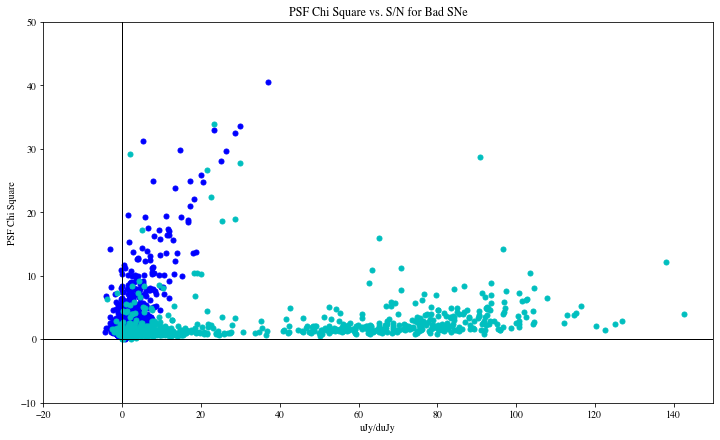

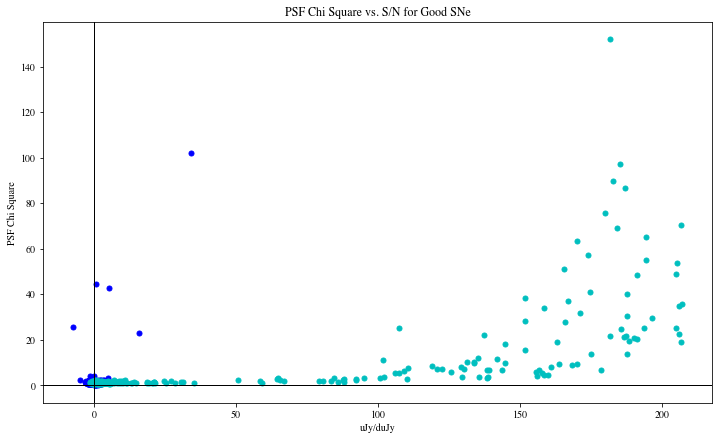

In [5]:
# For both samples of "good" and "bad" SNe, plot their PSF chi squares vs. uJy/duJy. 
# See if each SN's classification is predicted by the shape of its graph ("shallow" or "hockey stick").

"""def plot_data(lc_dict, lc_info):
    plt.figure()
    lc_info = lc_info.reset_index(drop=True)
    for index in range(0, len(lc_dict)):
        baseline = np.where(lc_dict[index].t['MJD'] < lc_info.loc[index,'mjdstart'])[0]
        sp, plot, dplot = dataPlot(lc_dict[index].t.loc[baseline,'uJy/duJy'],lc_dict[index].t.loc[baseline,'chi/N'])
    plt.axhline(linewidth=1,color='k')
    plt.axvline(linewidth=1,color='k')
    plt.ylabel('PSF Chi Square')
    plt.xlabel('uJy/duJy')
    return sp, plot, dplot

sp, plot1, dplot = plot_data(good_lc,lc_info_good)
matlib.setp(plot1,ms=5,color='g',marker='o')
plt.title('PSF Chi Square vs. S/N for Good SNe')
plt.xlim(-5,5)
plt.ylim(-1,3)

sp, plot2, dplot = plot_data(bad_lc,lc_info_bad)
matlib.setp(plot2,ms=5,color='r',marker='o')
plt.title('PSF Chi Square vs. S/N for Bad SNe')
plt.xlim(-20,400)
plt.ylim(-100,6000)"""

def plot_data(lc_dict, lc_info):
    plt.figure()
    lc_info = lc_info.reset_index(drop=True)
    for index in range(0, len(lc_info)):
        baseline = np.where(lc_dict[lc_info.loc[index,'lc_dict key']].t['MJD'] < lc_info.loc[index,'mjdstart'])[0]
        after_mjdstart = np.where(lc_dict[lc_info.loc[index,'lc_dict key']].t['MJD'] > lc_info.loc[index,'mjdstart'])[0]
        sp, plot1, dplot = dataPlot(lc_dict[lc_info.loc[index,'lc_dict key']].t.loc[baseline,'uJy/duJy'],lc_dict[lc_info.loc[index,'lc_dict key']].t.loc[baseline,'chi/N'])
        matlib.setp(plot1,ms=5,color='b',marker='o')
        sp, plot2, dplot = dataPlot(lc_dict[lc_info.loc[index,'lc_dict key']].t.loc[after_mjdstart,'uJy/duJy'],lc_dict[lc_info.loc[index,'lc_dict key']].t.loc[after_mjdstart,'chi/N'])
        matlib.setp(plot2,ms=5,color='c',marker='o')
    plt.axhline(linewidth=1,color='k')
    plt.axvline(linewidth=1,color='k')
    plt.ylabel('PSF Chi Square')
    plt.xlabel('uJy/duJy')

plot_data(bad_lc,lc_info_bad)
plt.title('PSF Chi Square vs. S/N for Bad SNe')
plt.xlim(-20,150)
plt.ylim(-10,50)

plot_data(good_lc,lc_info_good)
plt.title('PSF Chi Square vs. S/N for Good SNe')

2020lse
2020jfo
2019vxm


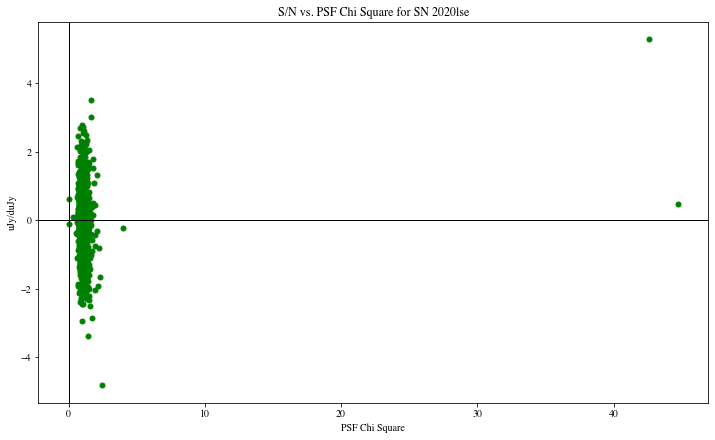

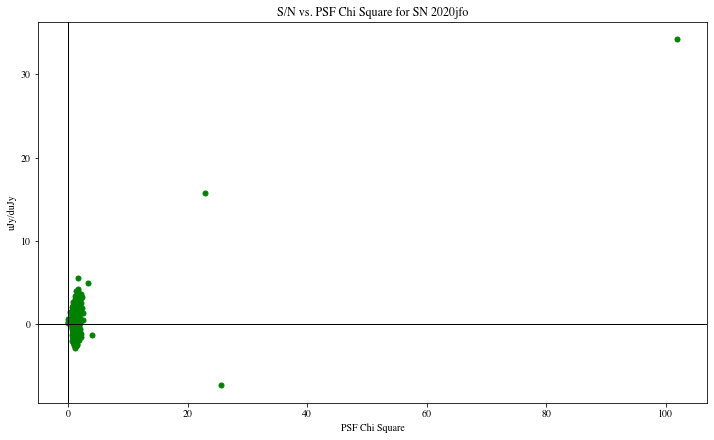

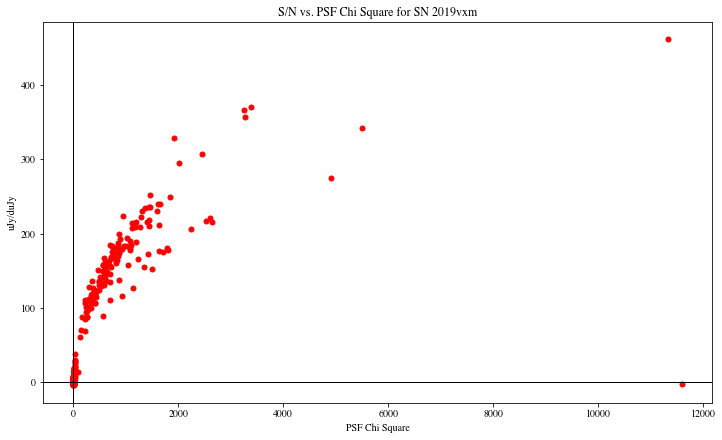

In [6]:
def plot_data2(lc_dict, lc_info):
    lc_info = lc_info.reset_index(drop=True)
    for index in range(0, len(lc_info)):
        print(lc_info.loc[index,'tnsname'])
        baseline = np.where(lc_dict[index].t['MJD'] < lc_info.loc[index,'mjdstart'])[0]
        plt.figure()
        sp, plot, dplot = dataPlot(lc_dict[index].t.loc[baseline,'chi/N'],lc_dict[index].t.loc[baseline,'uJy/duJy'])
        plt.axhline(linewidth=1,color='k')
        plt.axvline(linewidth=1,color='k')
        plt.xlabel('PSF Chi Square')
        plt.ylabel('uJy/duJy')
        if lc_info.loc[index,'classification']=='good':
            color = 'g'
        else:
            color = 'r'
        matlib.setp(plot,ms=5,color=color,marker='o')
        plt.title('S/N vs. PSF Chi Square for SN ' + lc_info.loc[index,'tnsname'])
        #return sp, plot, dplot

#sp, plot1, dplot = plot_data2(good_lc,lc_info_good)
plot_data2(good_lc,lc_info_good)
#plt.xlim(0,3)
#plt.ylim(-5,5)

#sp, plot2, dplot = plot_data2(bad_lc,lc_info_bad)
plot_data2(bad_lc,lc_info_bad)
#plt.xlim(0,10)
#plt.ylim(-5,15)



Cutting 2020lse...
abs(uJy/duJy) cut at: 3.00 
x2 cut from 2.00 to 50.00 inclusive, with step size 2
Static chi square cut at 50: 
- Baseline: 0.00% cut
- After MJD start: 0.00% cut
PSF Chi-Square Cut  AGood,Cut  ABad,Cut  AGood,Keep  ABad,Keep   B_HCut    B_HKeep   M_HCut    M_HKeep
                 2   0.941176  0.117647   98.705882   0.235294 1.058824  98.941176 2.341137  97.658863
                 4   0.117647  0.117647   99.529412   0.235294 0.235294  99.764706 1.337793  98.662207
                 6   0.117647  0.117647   99.529412   0.235294 0.235294  99.764706 1.337793  98.662207
                 8   0.117647  0.117647   99.529412   0.235294 0.235294  99.764706 1.003344  98.996656
                10   0.117647  0.117647   99.529412   0.235294 0.235294  99.764706 0.668896  99.331104
                12   0.117647  0.117647   99.529412   0.235294 0.235294  99.764706 0.334448  99.665552
                14   0.117647  0.117647   99.529412   0.235294 0.235294  99.764706 0.334448  99.

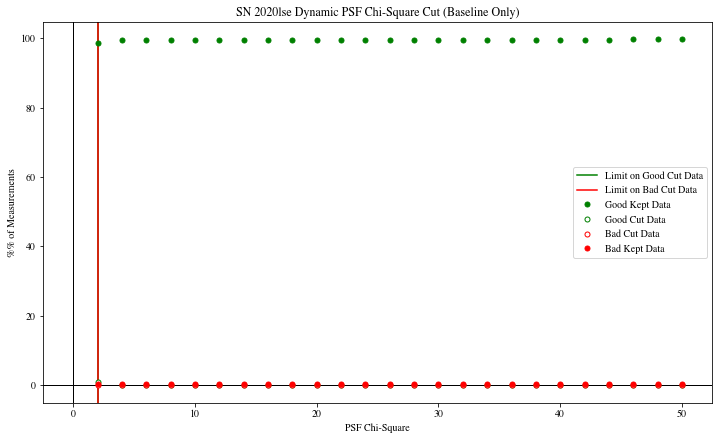

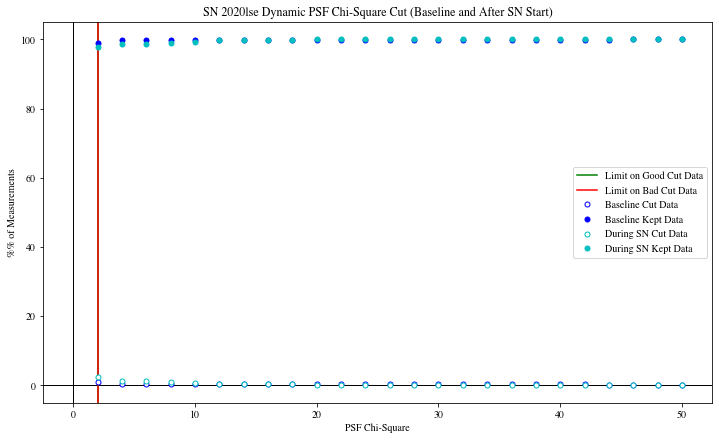

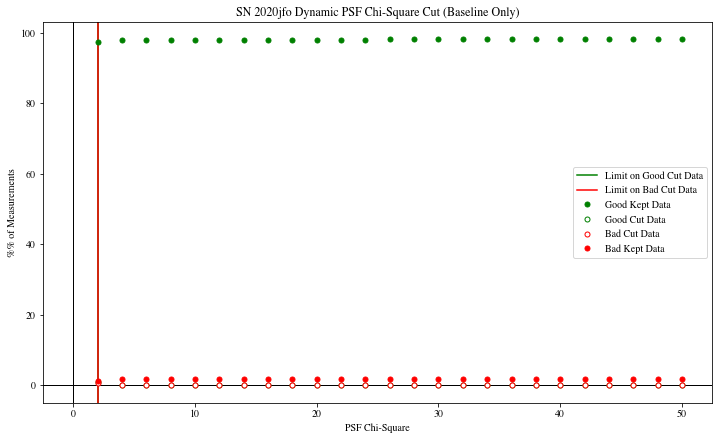

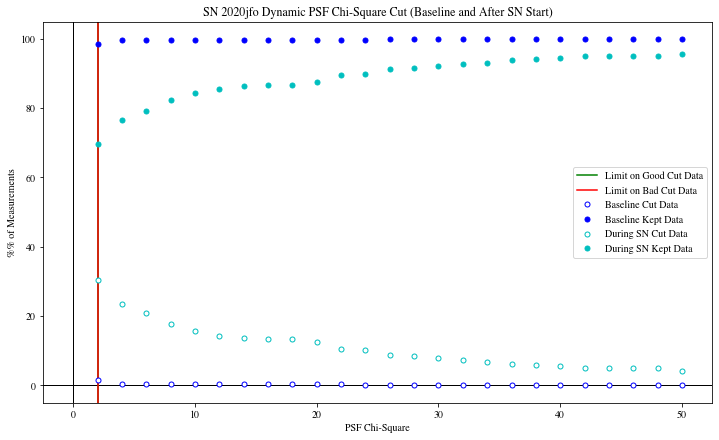

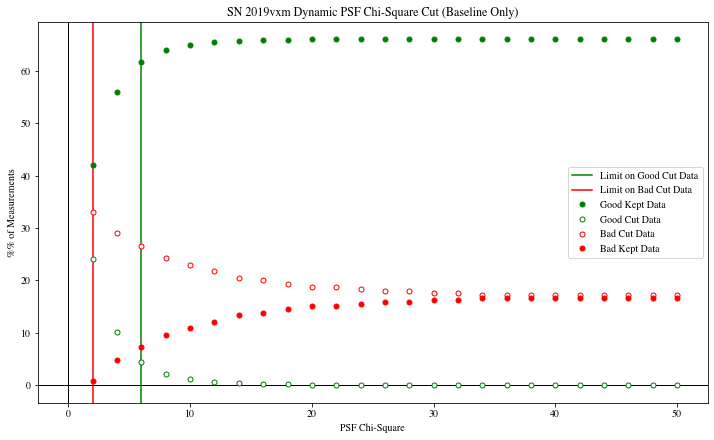

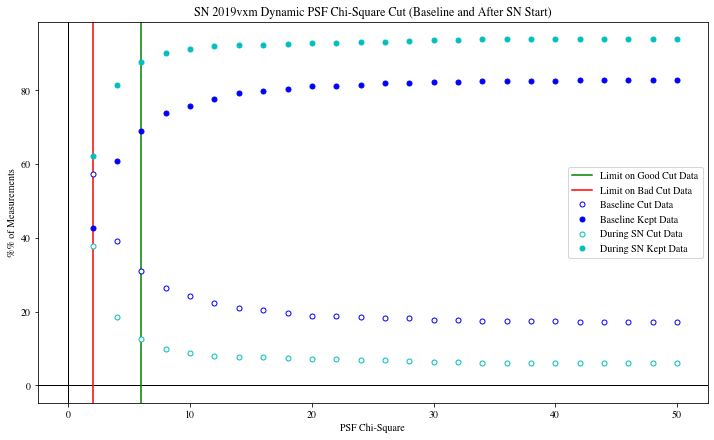

In [7]:
"""
1. static cut at x2=50; get percent cut before and after mjdstart
2. for different x2 cuts decreasing from 50 and cut at abs(s/n)=3 (or 5?):
    a. for baseline: calculate each quadrant's percent
    b. for both baseline and  SN: calculate each half's percent 
"""

global cut_start
global cut_stop
global cut_step
cut_start = 2
cut_stop = 50 # this is inclusive
cut_step = 2

global sn_cut
sn_cut = 3 # abs(uJy/duJy) cut

def plot_table(table,info,lim1,lim2):
    plt.figure()
    plt.title('SN '+info['tnsname']+' Dynamic PSF Chi-Square Cut (Baseline Only)')
    plt.axhline(linewidth=1,color='k')
    plt.axvline(linewidth=1,color='k')
    plt.axvline(x=lim1,color='g',label='Limit on Good Cut Data')
    plt.axvline(x=lim2,color='r',label='Limit on Bad Cut Data')
    plt.xlabel('PSF Chi-Square')
    plt.ylabel('%% of Measurements')

    sp, a_good_keep, dplot = dataPlot(table.t['PSF Chi-Square Cut'], table.t['AGood,Keep'])
    matlib.setp(a_good_keep,ms=5,color='g',marker='o',label='Good Kept Data')
    sp, a_good_cut, dplot = dataPlot(table.t['PSF Chi-Square Cut'], table.t['AGood,Cut'])
    matlib.setp(a_good_cut,ms=5,color='g',marker='o',mfc='white',label='Good Cut Data')
    sp, a_bad_cut, dplot = dataPlot(table.t['PSF Chi-Square Cut'], table.t['ABad,Cut'])
    matlib.setp(a_bad_cut,ms=5,color='r',marker='o',mfc='white',label='Bad Cut Data')
    sp, a_bad_keep, dplot = dataPlot(table.t['PSF Chi-Square Cut'], table.t['ABad,Keep'])
    matlib.setp(a_bad_keep,ms=5,color='r',marker='o',label='Bad Kept Data')
    plt.legend()

    plt.savefig(info['tnsname']+'chisquare_goodbad.png',dpi=200)
    
    plt.figure()
    plt.title('SN '+info['tnsname']+' Dynamic PSF Chi-Square Cut (Baseline and After SN Start)')
    plt.axhline(linewidth=1,color='k')
    plt.axvline(linewidth=1,color='k')
    plt.axvline(x=lim1,color='g',label='Limit on Good Cut Data')
    plt.axvline(x=lim2,color='r',label='Limit on Bad Cut Data')
    plt.xlabel('PSF Chi-Square')
    plt.ylabel('%% of Measurements')

    sp, b_cut, dplot = dataPlot(table.t['PSF Chi-Square Cut'], table.t['B_HCut'])
    matlib.setp(b_cut,ms=5,color='b',marker='o',mfc='white',label='Baseline Cut Data')
    sp, b_keep, dplot = dataPlot(table.t['PSF Chi-Square Cut'], table.t['B_HKeep'])
    matlib.setp(b_keep,ms=5,color='b',marker='o',label='Baseline Kept Data')
    sp, m_cut, dplot = dataPlot(table.t['PSF Chi-Square Cut'], table.t['M_HCut'])
    matlib.setp(m_cut,ms=5,color='c',marker='o',mfc='white',label='During SN Cut Data')
    sp, m_keep, dplot = dataPlot(table.t['PSF Chi-Square Cut'], table.t['M_HKeep'])
    matlib.setp(m_keep,ms=5,color='c',marker='o',label='During SN Kept Data') 
    plt.legend()

    plt.savefig(info['tnsname']+'chisquare_beforeafter.png',dpi=200)

def get_cut_limits(table,info):
    # cut no more than 95% bad and no more than 10% good
    lim1 = 0
    lim2 = 50
    for index in range(len(table.t)-1,-1,-1):
        if not(table.t.loc[index,'AGood,Cut'] > 10.0):
            lim1 = table.t.loc[index,'PSF Chi-Square Cut']
        if not(table.t.loc[index,'ABad,Cut'] > 95.0):
            lim2 = table.t.loc[index,'PSF Chi-Square Cut']

    return lim1, lim2

def get_plot_table(lc_dict,lc_info):
    lc_info = lc_info.reset_index(drop=True)
    for index in range(0,len(lc_info)):
        chisquarecuts = pdastrostatsclass(columns=['PSF Chi-Square Cut', 
                                                    'AGood,Cut','ABad,Cut','AGood,Keep','ABad,Keep', # 4 quadrants for baseline
                                                    'B_HCut','B_HKeep','M_HCut','M_HKeep']) # 2 halves for baseline and after mjdstart

        print('\nCutting %s...' % lc_info.loc[index,'tnsname'])
        print('abs(uJy/duJy) cut at: %0.2f \nx2 cut from %0.2f to %0.2f inclusive, with step size %d' % (sn_cut,cut_start,cut_stop,cut_step))

        baseline = np.where(lc_dict[index].t['MJD'] < lc_info.loc[index,'mjdstart'])[0]
        aftermjdstart = AnotB(lc_dict[index].getindices(),baseline)
        
        # static cut at x2=50
        x2cut_50 = np.where(lc_dict[index].t['chi/N'] < 50)[0]
        print('Static chi square cut at 50: \n- Baseline: %0.2f%% cut\n- After MJD start: %0.2f%% cut' % 
            (100*len(AnotB(baseline,x2cut_50))/len(baseline), 100*len(AnotB(aftermjdstart,x2cut_50))/len(aftermjdstart)))
        
        # for different x2 cuts decreasing from 50 and cut at abs(s/n)=3
        sncut_i = np.where(lc_dict[index].t['uJy/duJy'] < sn_cut)[0]
        b_sncut_i = AandB(baseline,sncut_i)
        for cut in range(cut_start,cut_stop+1,cut_step):
            x2cut_i = np.where(lc_dict[index].t['chi/N'] < cut)[0]
            b_x2cut_i = AandB(baseline,x2cut_i)

            df = pd.DataFrame([[cut, 
                                100*len(AnotB(b_sncut_i,b_x2cut_i))/len(baseline), 100*len(AandB(AnotB(baseline,b_sncut_i),AnotB(baseline,b_x2cut_i)))/len(baseline), 
                                100*len(AandB(b_sncut_i,b_x2cut_i))/len(baseline), 100*len(AnotB(b_x2cut_i,b_sncut_i))/len(baseline),

                                100*len(AnotB(baseline,x2cut_i))/len(baseline), 100*len(AandB(baseline,x2cut_i))/len(baseline),
                                100*len(AnotB(aftermjdstart,x2cut_i))/len(aftermjdstart), 100*len(AandB(aftermjdstart,x2cut_i))/len(aftermjdstart)]],
                                columns=['PSF Chi-Square Cut', 'AGood,Cut','ABad,Cut','AGood,Keep','ABad,Keep', 'B_HCut','B_HKeep','M_HCut','M_HKeep'])
            chisquarecuts.t = pd.concat([chisquarecuts.t,df],ignore_index=True)

        chisquarecuts.write()

        lim1, lim2 = get_cut_limits(chisquarecuts,lc_info.loc[index])
        print('Limit on good cut data (<= 10%%): %0.2f; limit on bad cut (<= 95%%) data: %0.2f' % (lim1,lim2))

        plot_table(chisquarecuts,lc_info.loc[index],lim1,lim2)

        lc_info.loc[index,'lim1'] = lim1
        lc_info.loc[index,'lim2'] = lim2

    return lc_info

lc_info_good = get_plot_table(good_lc,lc_info_good)
lc_info_bad = get_plot_table(bad_lc,lc_info_bad)

lc_info = pd.concat([lc_info_good,lc_info_bad],ignore_index=True)

print(lc_info)

   tnsname  mjdstart classification lc_dict key  lim1  lim2
0  2020lse  58955.26           good           0   2.0   2.0
1  2020jfo  58925.20           good           1   2.0   2.0
2  2019vxm  58768.04            bad           0   6.0   2.0


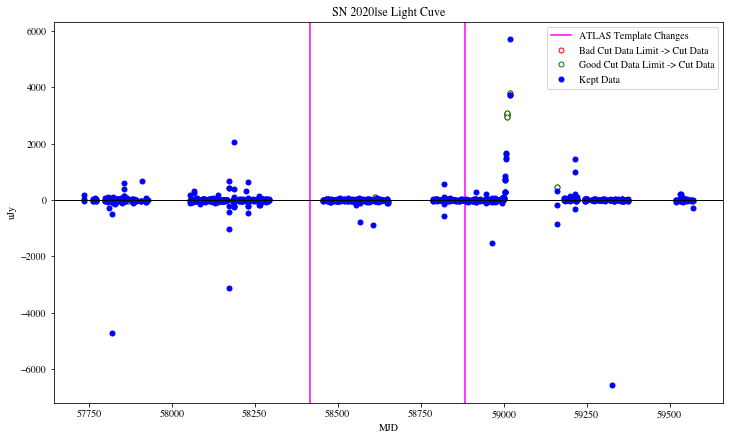

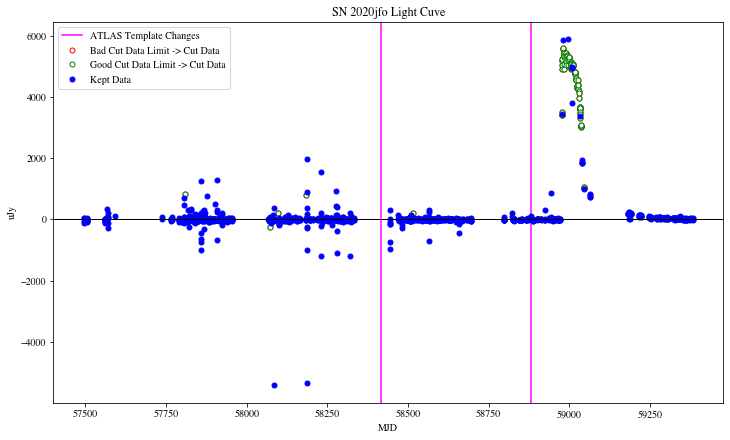

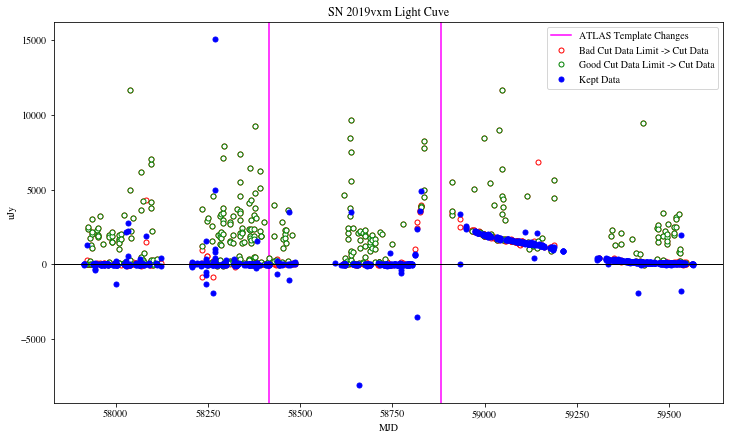

In [8]:
def plot_cut_lc(lc,info):
    plt.figure()

    plt.axvline(x=58882,color='magenta',label='ATLAS Template Changes')
    plt.axvline(x=58417,color='magenta')

    kept = AandB(np.where(lc.t['chi/N'] < info['lim1'])[0],np.where(lc.t['chi/N'] < info['lim2'])[0])
    g_cut = np.where(lc.t['chi/N'] > info['lim1'])[0]
    b_cut = np.where(lc.t['chi/N'] > info['lim2'])[0]
        
    sp, plot_b_cut, dplot = dataPlot(lc.t.loc[b_cut,'MJD'],lc.t.loc[b_cut,'uJy'])
    matlib.setp(plot_b_cut,ms=5,color='r',marker='o',mfc='white',label='Bad Cut Data Limit -> Cut Data')
    sp, plot_g_cut, dplot = dataPlot(lc.t.loc[g_cut,'MJD'],lc.t.loc[g_cut,'uJy'])
    matlib.setp(plot_g_cut,ms=5,color='g',marker='o',mfc='white',label='Good Cut Data Limit -> Cut Data')
    sp, plot_kept, dplot = dataPlot(lc.t.loc[kept,'MJD'],lc.t.loc[kept,'uJy'])
    matlib.setp(plot_kept,ms=5,color='b',marker='o',label='Kept Data')

    plt.axhline(linewidth=1,color='k')
    plt.ylabel('uJy')
    plt.xlabel('MJD')
    plt.title('SN '+info['tnsname']+' Light Cuve')
    plt.legend()

def plot_cut_lcs(lc_dict,lc_info):
    lc_info = lc_info.reset_index(drop=True)
    for index in range(0,len(lc_info)):
        plot_cut_lc(lc_dict[index],lc_info.loc[index])

print(lc_info)
plot_cut_lcs(good_lc,lc_info_good)
plot_cut_lcs(bad_lc,lc_info_bad)

<strong>Do template changes, high flux, or both affect the PSF chi-squares of a SN?</strong>
- Divide light curve into 6 MJD regions: baseline (t0, t1, t2), SN (t0, t1, t2).
- For each MJD region:
    - Calculate the number of detections. If n < 50, disregard. If n > 50, continue.
    - Hockeystick check: % data with x2>100 > 1%.
    - Extended tail check: % data with 5<x2<100 > 1%.
    - Else the region is well-behaved.
    - Add classification to table.

In [9]:
global tchange1
global tchange2
tchange1 = 58417
tchange2 = 58882

global hockeystick_cut
global extendedtail_cut
hockeystick_cut = 100
extendedtail_cut = 5

def get_region_table(lc,info):
    regionstates = pdastrostatsclass(columns=['region','hockeystick_percent_cut','extendedtail_percent_cut','state'])
    regionstates.t['region'] = ['b_t0','b_t1','b_t2','sn_t0','sn_t1','sn_t2']
    
    baseline = np.where(lc.t['MJD'] < info['mjdstart'])[0]
    aftersnstart = AnotB(lc.getindices(),baseline)

    ranges = {}
    ranges[0] = AandB(baseline, np.where(lc.t['MJD'] < tchange1)[0])
    ranges[1] = AandB(baseline, AandB(np.where(lc.t['MJD'] > tchange1)[0], np.where(lc.t['MJD'] < tchange2)[0]))
    ranges[2] = AandB(baseline, np.where(lc.t['MJD'] > tchange2)[0])
    ranges[3] = AandB(aftersnstart, np.where(lc.t['MJD'] < tchange1)[0])
    ranges[4] = AandB(aftersnstart, AandB(np.where(lc.t['MJD'] > tchange1)[0], np.where(lc.t['MJD'] < tchange2)[0]))
    ranges[5] = AandB(aftersnstart, np.where(lc.t['MJD'] > tchange2)[0])

    for index in range(0,len(ranges)):
        if(len(ranges[index])<50):
            regionstates.t.loc[index,'state'] = '-'
            continue

        hockeystick_cut_i = AandB(ranges[index], np.where(lc.t['chi/N']>=hockeystick_cut)[0])
        extendedtail_cut_i = AandB(ranges[index], AandB(np.where(lc.t['chi/N']>=extendedtail_cut)[0], np.where(lc.t['chi/N']<hockeystick_cut)[0]))

        regionstates.t.loc[index,'hockeystick_percent_cut'] = 100.0*len(hockeystick_cut_i)/len(lc.t)
        regionstates.t.loc[index,'extendedtail_percent_cut'] = 100.0*len(extendedtail_cut_i)/len(lc.t)
        
        if(regionstates.t.loc[index,'hockeystick_percent_cut'] > 1.0):
            regionstates.t.loc[index,'state'] = 'hockeystick'
        elif(regionstates.t.loc[index,'extendedtail_percent_cut'] > 1.0):
            regionstates.t.loc[index,'state'] = 'extended tail'
        else:
            regionstates.t.loc[index,'state'] = 'well-behaved'

    return regionstates

def get_region_table_loop(lc_dict,lc_info):
    df = pd.DataFrame(columns=['tnsname','classification','b_t0','b_t1','b_t2','sn_t0','sn_t1','sn_t2'])
    lc_info = lc_info.reset_index(drop=True)
    for index in range(0,len(lc_info)):
        regionstates = get_region_table(lc_dict[index],lc_info.loc[index])
        print('SN %s MJD region states w.r.t. PSF chi-square values:' % (lc_info.loc[index,'tnsname'])) 
        print(regionstates.t,'\n')

        df.loc[index,'tnsname'] = lc_info.loc[index,'tnsname']
        df.loc[index,'classification'] = lc_info.loc[index,'classification']
        for i in range(0,len(regionstates.t['region'])):
            df.loc[index,regionstates.t.loc[i,'region']] = regionstates.t.loc[i,'state']
        
    return df

regionstates_allsne = pdastrostatsclass(columns=['tnsname','classification','b_t0','b_t1','b_t2','sn_t0','sn_t1','sn_t2'])

print('Template changes at %d and %d MJD' % (tchange1,tchange2))
print('PSF chi-square cut for hockeystick classification: %d; PSF chi-square cut for extended tail classification: %d\n' % (hockeystick_cut,extendedtail_cut))
df1 = get_region_table_loop(good_lc,lc_info_good)
df2 = get_region_table_loop(bad_lc,lc_info_bad)
regionstates_allsne.t = pd.concat([df1,df2],ignore_index=True)

print('All SNe states:')
regionstates_allsne.write()

Template changes at 58417 and 58882 MJD
PSF chi-square cut for hockeystick classification: 100; PSF chi-square cut for extended tail classification: 5

SN 2020lse MJD region states w.r.t. PSF chi-square values:
  region hockeystick_percent_cut extendedtail_percent_cut         state
0   b_t0                     0.0                 0.087032  well-behaved
1   b_t1                     0.0                 0.087032  well-behaved
2   b_t2                     0.0                      0.0  well-behaved
3  sn_t0                     NaN                      NaN             -
4  sn_t1                     NaN                      NaN             -
5  sn_t2                     0.0                 0.348129  well-behaved 

SN 2020jfo MJD region states w.r.t. PSF chi-square values:
  region hockeystick_percent_cut extendedtail_percent_cut          state
0   b_t0                0.078864                 0.157729   well-behaved
1   b_t1                     0.0                      0.0   well-behaved
2   b

0